In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

\Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

**Tasks to Solve :**

To predict which customer is more likely to purchase the newly introduced travel package

Which variables are most significant.

Which segment of customers should be targeted more.

In [ ]:
df=pd.read_csv('/content/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **Data Preprocessing**

1.   duplicates
2.   null values
3.   data types






Checking Duplicates

In [ ]:
df[df.duplicated()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


Checking datatypes

In [ ]:
df.dtypes,df.head()

(CustomerID                    int64
 ProdTaken                     int64
 Age                         float64
 TypeofContact                object
 CityTier                      int64
 DurationOfPitch             float64
 Occupation                   object
 Gender                       object
 NumberOfPersonVisiting        int64
 NumberOfFollowups           float64
 ProductPitched               object
 PreferredPropertyStar       float64
 MaritalStatus                object
 NumberOfTrips               float64
 Passport                      int64
 PitchSatisfactionScore        int64
 OwnCar                        int64
 NumberOfChildrenVisiting    float64
 Designation                  object
 MonthlyIncome               float64
 dtype: object,
    CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
 0      200000          1  41.0     Self Enquiry         3              6.0   
 1      200001          0  49.0  Company Invited         1             14.0   
 2     

Checking null values


In [ ]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


[]

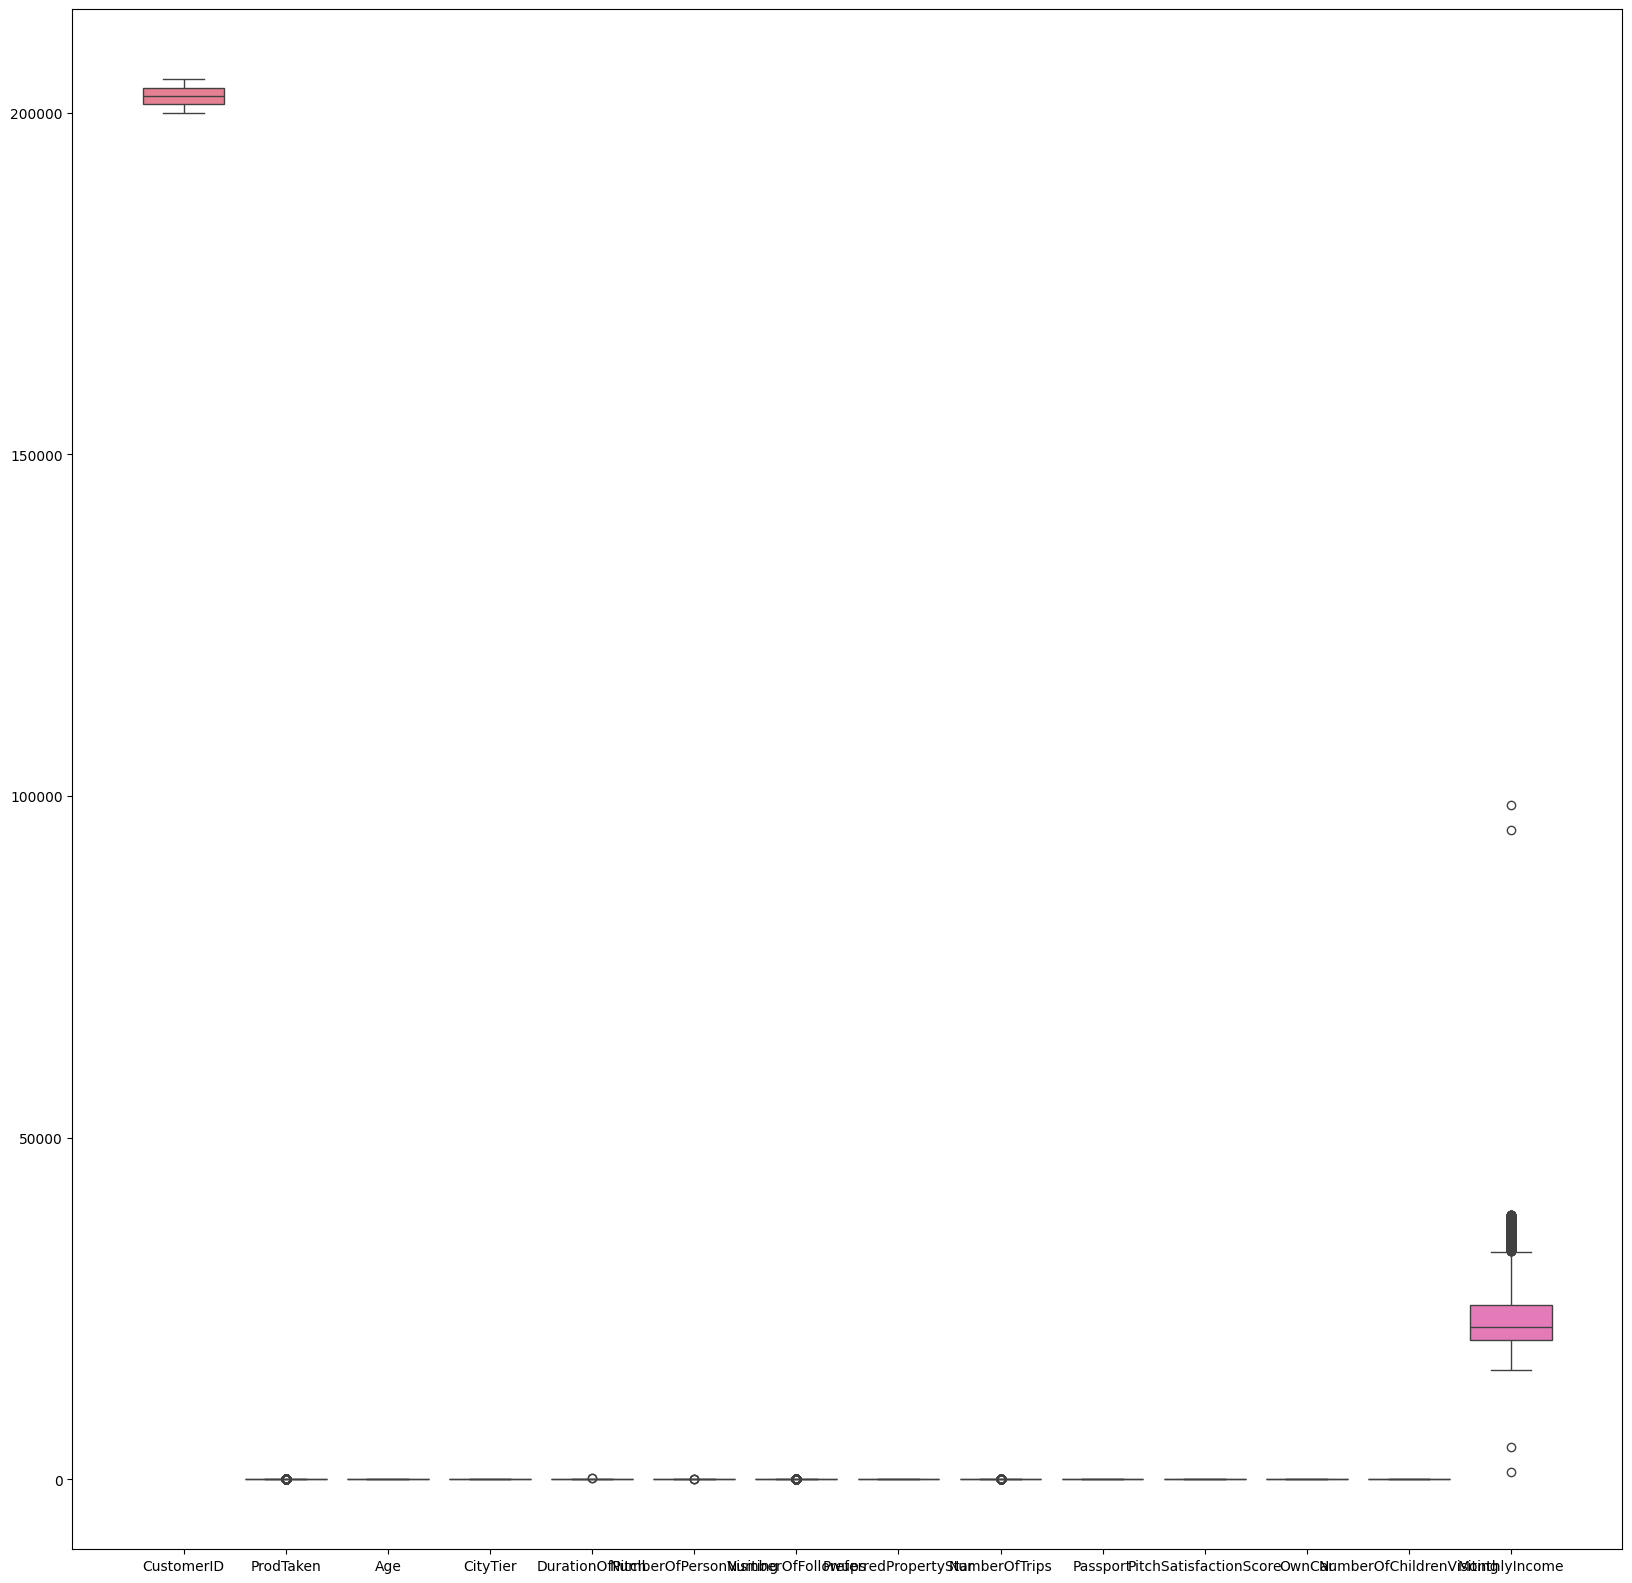

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.plot()

Some outliers are present in income
so w use median()

In [ ]:
mode = df['MonthlyIncome'].median()

In [ ]:
df['MonthlyIncome'].fillna(mode,inplace=True)

In [ ]:
df['MonthlyIncome'].isnull().sum()

0

**for other features we take the mean and mode**

In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0 and (df[col].dtype == 'int' and df[col].dtype == 'float') :
    mean=df[col].mean()
    df[col].fillna(mean,inplace=True)

  else :
    mode=df[col].mode()[0]
    df[col].fillna(mode,inplace=True)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [ ]:
df.describe(include='all')

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888,4888.000000,4888.000000,4888,4888,4888.000000,4888.000000,4888,4888.000000,4888,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888,4888.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3469,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.501023,NaN,1.654255,15.157529,NaN,NaN,2.905074,3.711129,NaN,3.577946,NaN,3.201105,0.290917,3.078151,0.620295,1.184738,NaN,23559.179419
std,1411.188388,0.390925,9.115070,NaN,0.916583,8.420753,NaN,NaN,0.724891,0.998271,NaN,0.797005,NaN,1.833979,0.454232,1.365792,0.485363,0.852323,NaN,5257.862921
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20485.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,43.000000,NaN,3.000000,19.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25424.750000


In [ ]:
df.info

<bound method DataFrame.info of       CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0  35.0     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         M

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    vc = df[col].value_counts()
    print(vc.to_frame(name='count'))


                 count
TypeofContact         
Self Enquiry      3469
Company Invited   1419
                count
Occupation           
Salaried         2368
Small Business   2084
Large Business    434
Free Lancer         2
         count
Gender        
Male      2916
Female    1817
Fe Male    155
                count
ProductPitched       
Basic            1842
Deluxe           1732
Standard          742
Super Deluxe      342
King              230
               count
MaritalStatus       
Married         2340
Divorced         950
Single           916
Unmarried        682
                count
Designation          
Executive        1842
Manager          1732
Senior Manager    742
AVP               342
VP                230


the data containing the female and fe male
sigle and unmarried

In [ ]:
def fun(x):
  return str(x).strip()
df['MaritalStatus'].apply(fun)

,MaritalStatus
0,Single
1,Divorced
2,Single
3,Divorced
4,Divorced
...,...
4883,Unmarried
4884,Single
4885,Married
4886,Single


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [ ]:
df['Gender'].replace('Fe Male','Female',inplace=True)
df['MaritalStatus'].replace('Single','Unmarried',inplace=True)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


# **Exploratory Data Analysis**

In [ ]:
df_eda=df.copy()

[]

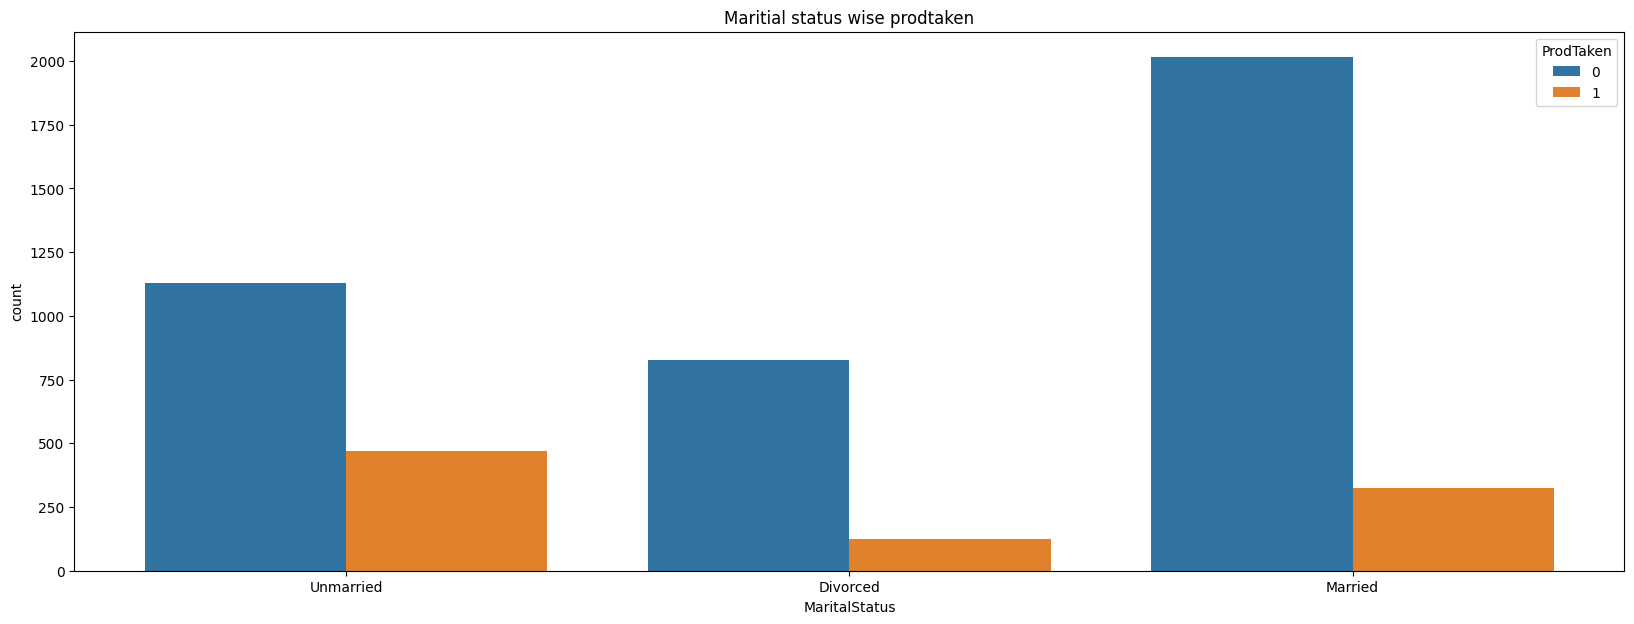

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Maritial status wise prodtaken')
sns.countplot(data=df_eda,x='MaritalStatus',hue='ProdTaken',)
plt.plot()

Relation b/w salary and pro taken

[]

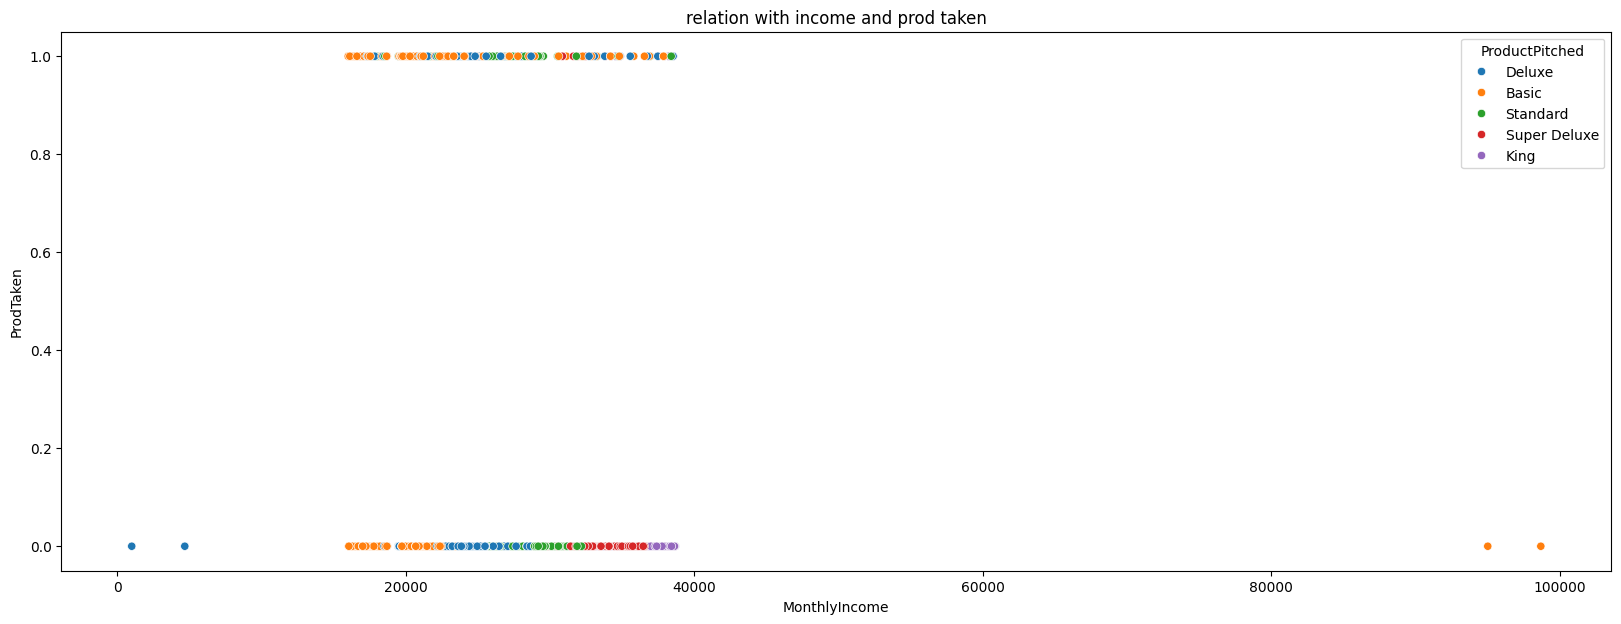

In [ ]:
plt.figure(figsize=(20,7))
plt.title('relation with income and prod taken')
sns.scatterplot(data=df_eda,x='MonthlyIncome',y='ProdTaken',hue='ProductPitched')
plt.plot()

<Axes: >

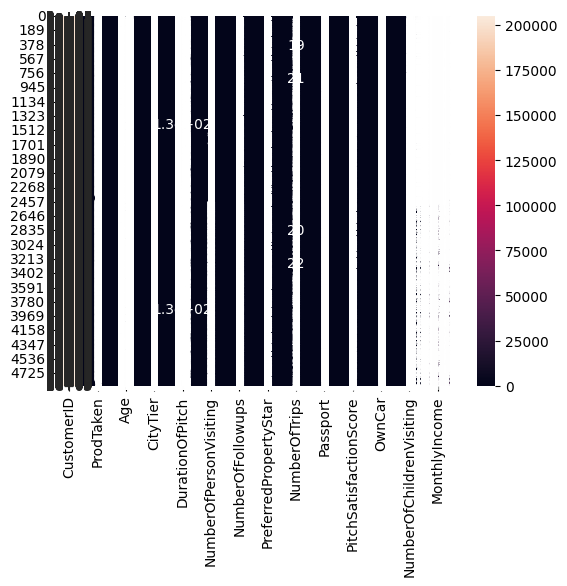

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Plot heatmap with only numeric data
sns.heatmap(numeric_df,annot=True)

<ipython-input-24-a3b19a9f359f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed
<ipython-input-24-a3b19a9f359f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed
<ipython-input-24-a3b19a9f359f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed
<ipython-input-24-a3b19a9f359f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed
<ipython-input-24-a3b19a9f359f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed
<ipython-input-24-a3

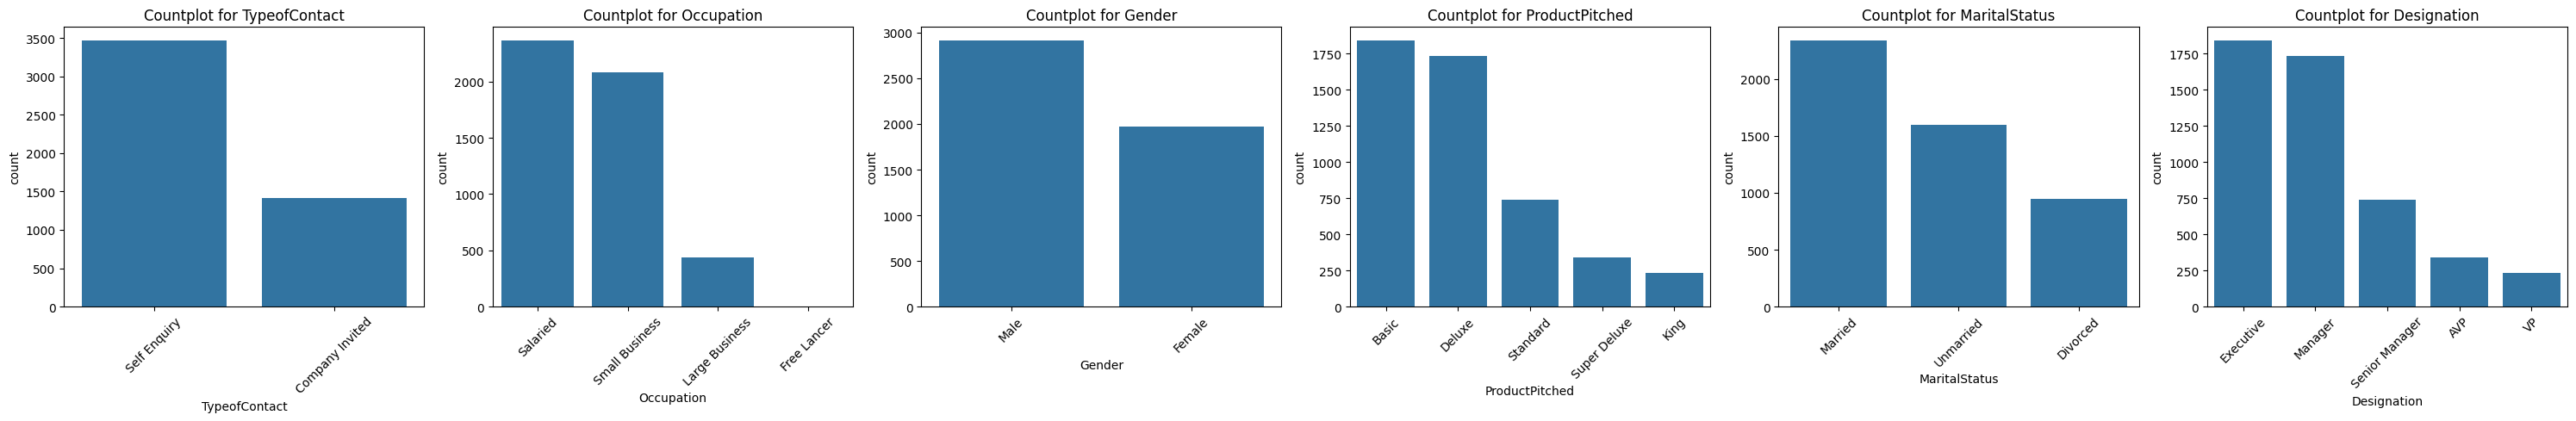

In [ ]:
# Select all categorical columns
cat_columns = df.select_dtypes(include='object').columns

# Set up the subplots
n_cols = len(cat_columns)
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5), squeeze=False)

# Plot countplot for each categorical column
for ax, col in zip(axes.flatten(), cat_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Countplot for {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


# **Exploratory Data Analysis**

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,35.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
corr=df.corr(numeric_only=True)
corr

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.042772,0.012975,0.090666,0.604013,0.423678,0.007113,0.202611,0.007974,-0.035847,0.003805,0.507778,0.279596
ProdTaken,0.056506,1.000000,-0.143675,0.086852,0.076089,0.009627,0.111560,0.098704,0.023684,0.260844,0.051394,-0.011508,0.008009,-0.126420
Age,0.042772,-0.143675,1.000000,-0.011151,0.001440,0.021879,0.004418,-0.016122,0.157800,0.032250,0.016973,0.047219,0.011683,0.463495
CityTier,0.012975,0.086852,-0.011151,1.000000,0.015197,-0.001671,0.024333,-0.008479,-0.026066,0.001793,-0.042160,0.003817,0.000578,0.051790
DurationOfPitch,0.090666,0.076089,0.001440,0.015197,1.000000,0.088100,0.026178,-0.004635,0.022792,0.035254,-0.002120,-0.003937,0.049886,0.016493
NumberOfPersonVisiting,0.604013,0.009627,0.021879,-0.001671,0.088100,1.000000,0.324895,0.030519,0.179055,0.011177,-0.019581,0.010362,0.606321,0.198449
NumberOfFollowups,0.423678,0.111560,0.004418,0.024333,0.026178,0.324895,1.000000,-0.026989,0.127746,0.004411,0.004405,0.012186,0.281583,0.175921
PreferredPropertyStar,0.007113,0.098704,-0.016122,-0.008479,-0.004635,0.030519,-0.026989,1.000000,0.009782,0.001221,-0.024019,0.013577,0.031362,-0.000508
NumberOfTrips,0.202611,0.023684,0.157800,-0.026066,0.022792,0.179055,0.127746,0.009782,1.000000,0.013517,-0.005295,-0.014195,0.149155,0.074390
Passport,0.007974,0.260844,0.032250,0.001793,0.035254,0.011177,0.004411,0.001221,0.013517,1.000000,0.002926,-0.022330,0.020244,0.003333


<Axes: >

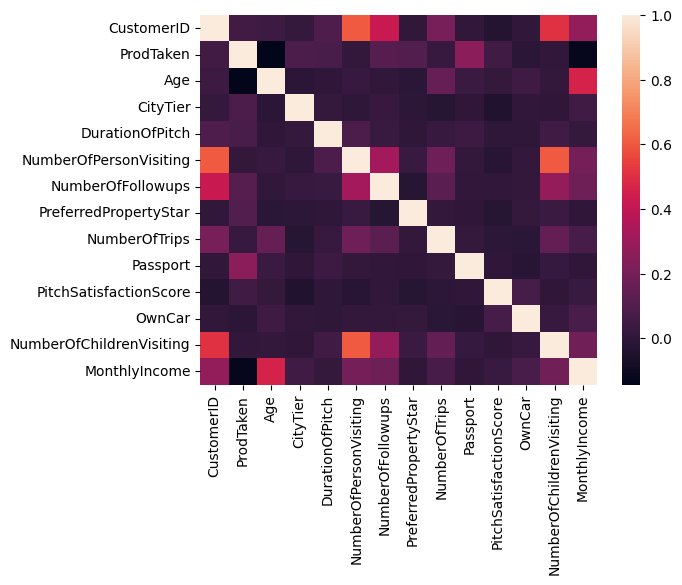

In [ ]:
sns.heatmap(corr)

In [ ]:
df.drop('CustomerID',inplace=True,axis=1)


NumberOfFollowups = NumberOfPersonVisiting + NumberOfChildrenVisiting

so we dont want these columns

In [ ]:
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'],inplace=True,axis=1,)

In [ ]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,35.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [ ]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,35.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [ ]:
numeric_cols=df.select_dtypes(include='number').columns
numeric_cols

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome'],
      dtype='object')

In [ ]:
categorical_cols=df.select_dtypes(exclude='number').columns
categorical_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [ ]:
for col in categorical_cols:
  vc=df[col].value_counts()
  print(vc.to_frame())

                 count
TypeofContact         
Self Enquiry      3469
Company Invited   1419
                count
Occupation           
Salaried         2368
Small Business   2084
Large Business    434
Free Lancer         2
        count
Gender       
Male     2916
Female   1972
                count
ProductPitched       
Basic            1842
Deluxe           1732
Standard          742
Super Deluxe      342
King              230
               count
MaritalStatus       
Married         2340
Unmarried       1598
Divorced         950
                count
Designation          
Executive        1842
Manager          1732
Senior Manager    742
AVP               342
VP                230


for TypeofContact and Gender we use label encoding

In [ ]:
from collections import Counter
Counter(df['ProdTaken'])

Counter({1: 920, 0: 3968})

# **Train Test Split**

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
X=df[[ 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome']]
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,35.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [ ]:
y=df['ProdTaken']
y

,ProdTaken
0,1
1,0
2,1
3,0
4,0
...,...
4883,1
4884,1
4885,1
4886,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=18)

**Label Encoding , One hot encoding and Standerdization**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
lb2=LabelEncoder()
X_train['Gender']=lb1.fit_transform(X_train['Gender'])
X_test['Gender']=lb1.transform(X_test['Gender'])

X_train['TypeofContact']=lb2.fit_transform(X_train['TypeofContact'])
X_test['TypeofContact']=lb2.transform(X_test['TypeofContact'])

X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
4140,38.0,0,3,11.0,Small Business,1,4.0,Basic,3.0,Married,6.0,0,4,1,Executive,21471.0
3733,39.0,0,2,9.0,Salaried,1,4.0,Basic,4.0,Married,7.0,0,3,1,Executive,21270.0
1637,30.0,1,3,11.0,Salaried,0,3.0,Standard,3.0,Married,3.0,0,4,1,Senior Manager,24419.0
703,38.0,0,3,16.0,Large Business,0,3.0,Deluxe,3.0,Unmarried,2.0,1,3,0,Manager,20666.0
2270,28.0,0,1,6.0,Small Business,1,4.0,Basic,4.0,Married,2.0,0,4,1,Executive,17596.0


**One hot encoding and standerdization**

In [ ]:
catcols=[]
numcols=[]
for col in X_train.columns:
  if X_train[col].dtype == 'object' :
    catcols.append(col)
  else:
    numcols.append(col)

print(catcols)
print(numcols)

['Occupation', 'ProductPitched', 'MaritalStatus', 'Designation']
['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Gender', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome']


In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler=StandardScaler()
ohe=OneHotEncoder(drop='first')

In [ ]:
preprocess=ColumnTransformer(transformers=[
    ('scaler',scaler,numcols),
     ('ohe',ohe,catcols)

],remainder='passthrough')

In [ ]:
X_train=preprocess.fit_transform(X_train)
X_test=preprocess.transform(X_test)

In [ ]:
pdd=pd.DataFrame(X_train)
pdd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.046081,-1.552665,1.476839,-0.484226,0.822277,0.296761,-0.729117,1.526494,-0.649054,0.661616,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.156245,-1.552665,0.382801,-0.719328,0.822277,0.296761,0.533824,2.074174,-0.649054,-0.064760,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.835227,0.644054,1.476839,-0.484226,-1.216135,-0.702471,-0.729117,-0.116548,-0.649054,0.661616,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.046081,-1.552665,1.476839,0.103532,-1.216135,-0.702471,-0.729117,-0.664229,1.540703,-0.064760,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.055554,-1.552665,-0.711236,-1.071983,0.822277,0.296761,0.533824,-0.664229,-0.649054,0.661616,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,0.486735,0.644054,-0.711236,-0.836880,-1.216135,0.296761,1.796766,-1.211909,1.540703,0.661616,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3417,0.596899,-1.552665,-0.711236,-0.366674,0.822277,0.296761,-0.729117,1.526494,-0.649054,-0.064760,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3418,-0.725064,-1.552665,1.476839,-0.836880,0.822277,-0.702471,1.796766,-1.211909,-0.649054,-1.517512,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3419,-2.047026,-1.552665,1.476839,-0.366674,0.822277,0.296761,0.533824,-0.116548,1.540703,0.661616,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
models={
    'randomforest':RandomForestClassifier()
}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  X_pred=model.predict(X_train)
  print(list(models.keys())[i])
  print('---------------')
  print('training data performance')
  print(accuracy_score(y_train,X_pred))
  print(confusion_matrix(y_train,X_pred))
  print(classification_report(y_train,X_pred))
  y_pred=model.predict(X_test)
  print('testing data performance')
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

randomforest
---------------
training data performance
1.0
[[2791    0]
 [   0  630]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       630

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421

testing data performance
0.9277436946148603
[[1161   16]
 [  90  200]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1177
           1       0.93      0.69      0.79       290

    accuracy                           0.93      1467
   macro avg       0.93      0.84      0.87      1467
weighted avg       0.93      0.93      0.92      1467



**Multiple models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
models={
    'randomforest':RandomForestClassifier(),
    'decision tree':DecisionTreeClassifier(),
    'logistic regression':LogisticRegression()
}

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  X_pred=model.predict(X_train)
  print(list(models.keys())[i])
  print('---------------')
  print('training data performance')
  print(accuracy_score(y_train,X_pred))
  print(confusion_matrix(y_train,X_pred))
  print(classification_report(y_train,X_pred))
  y_pred=model.predict(X_test)
  print('testing data performance')
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

randomforest
---------------
training data performance
1.0
[[2791    0]
 [   0  630]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       630

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421

testing data performance
0.9222903885480572
[[1160   17]
 [  97  193]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1177
           1       0.92      0.67      0.77       290

    accuracy                           0.92      1467
   macro avg       0.92      0.83      0.86      1467
weighted avg       0.92      0.92      0.92      1467

decision tree
---------------
training data performance
1.0
[[2791    0]
 [   0  630]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    

# **Hyper parameter tuning**

In [ ]:
rfparams={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth':[1,2,3],
    'max_features':["sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]

}
rfparams

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [1, 2, 3],
 'max_features': ['sqrt', 'log2'],
 'class_weight': ['balanced', 'balanced_subsample']}

In [ ]:
RFC=RandomForestClassifier( )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(estimator=RFC,param_distributions=rfparams,scoring='accuracy',random_state=18)
rand.fit(X_train,y_train)
X_pred=rand.predict(X_train)
print('---------------')
print('training data performance')
print(accuracy_score(y_train,X_pred))
print(confusion_matrix(y_train,X_pred))
print(classification_report(y_train,X_pred))
y_pred=rand.predict(X_test)
print('testing data performance')
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


---------------
training data performance
0.7839812920198772
[[2240  551]
 [ 188  442]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2791
           1       0.45      0.70      0.54       630

    accuracy                           0.78      3421
   macro avg       0.68      0.75      0.70      3421
weighted avg       0.83      0.78      0.80      3421

testing data performance
0.7675528289025222
[[935 242]
 [ 99 191]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.85      1177
           1       0.44      0.66      0.53       290

    accuracy                           0.77      1467
   macro avg       0.67      0.73      0.69      1467
weighted avg       0.81      0.77      0.78      1467



In [ ]:
print(rand.best_params_)

{'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'log_loss', 'class_weight': 'balanced'}


# **Hyper parameter tuning for multiple models**

In [ ]:
dtparams={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[2,3,4],
    'class_weight':[{'0':i,'1':1}  for i in [10,100,500] for j in [10,100,500]]
}

In [ ]:
lrparams={
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.001,0.01,0.1,1.0],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight':[{'0':i,'1':1}  for i in [10,100,500] for j in [10,100,500]]

}

In [ ]:
lrparams={
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.001,0.01,0.1,1.0],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight':[{0:i,1:1}  for i in [10,100,500] for j in [10,100,500]]

}
rfparams={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth':[1,2,3],
    'max_features':["sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]

}
dtparams={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[2,3,4],
    'class_weight':[{0:i,1:1}  for i in [10,100,500] for j in [10,100,500]]
}




In [ ]:
Random_models=[
    ('logistic regression',LogisticRegression(),lrparams),
    ('decisio tree',DecisionTreeClassifier(),dtparams),
    ('random forest',RandomForestClassifier(),rfparams)
]

In [ ]:
for name, model, params in Random_models:
    print(f"Running RandomizedSearchCV for {name}...")

    # Initialize RandomizedSearchCV
    rand_search = RandomizedSearchCV(estimator=model,
                                      param_distributions=params,
                                      scoring='accuracy',
                                      n_iter=10,  # Number of parameter settings to sample
                                      cv=5,       # Number of cross-validation folds
                                      random_state=42)

    # Fit the RandomizedSearchCV
    rand_search.fit(X_train, y_train)

    # Make predictions
    X_pred = rand_search.predict(X_train)
    y_pred = rand_search.predict(X_test)
    print('training data performance')
    print(accuracy_score(y_train,X_pred))
    print(confusion_matrix(y_train,X_pred))
    print(classification_report(y_train,X_pred))
    y_pred=rand_search.predict(X_test)
    print('testing data performance')
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


Running RandomizedSearchCV for logistic regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of 

training data performance
0.8231511254019293
[[2790    1]
 [ 604   26]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2791
           1       0.96      0.04      0.08       630

    accuracy                           0.82      3421
   macro avg       0.89      0.52      0.49      3421
weighted avg       0.85      0.82      0.75      3421

testing data performance
0.8050443081117927
[[1176    1]
 [ 285    5]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1177
           1       0.83      0.02      0.03       290

    accuracy                           0.81      1467
   macro avg       0.82      0.51      0.46      1467
weighted avg       0.81      0.81      0.72      1467

Running RandomizedSearchCV for decisio tree...
training data performance
0.8184741303712365
[[2791    0]
 [ 621    9]]
              precision    recall  f1-score   support

           0       0.82      